#IMPORT LIBERLY

In [0]:
# load packages
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# not needed, only to prettify the plots.
import datetime 
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline

#IMPORT DATA

In [16]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/nutdnuy/Portfolio_optimization_with_Python/master/data/edhec-hedgefundindices.csv',index_col="date")
df

Convertible Arbitrage  CTA Global  ...  Short Selling  Funds Of Funds
date                                           ...                               
31/01/1997                   1.19        3.93  ...          -1.66            3.17
28/02/1997                   1.23        2.98  ...           4.26            1.06
31/03/1997                   0.78       -0.21  ...           7.78           -0.77
30/04/1997                   0.86       -1.70  ...          -1.29            0.09
31/05/1997                   1.56       -0.15  ...          -7.37            2.75
...                           ...         ...  ...            ...             ...
31/07/2018                   0.21       -0.58  ...          -0.52            0.18
31/08/2018                   0.24        1.66  ...          -2.14            0.15
30/09/2018                   0.34       -0.54  ...           0.36           -0.22
31/10/2018                  -0.73       -3.14  ...           2.37           -2.69
30/11/2018                  -0.68       -0.53  ...          -0.21           -0.71

[263 rows x 13 columns]

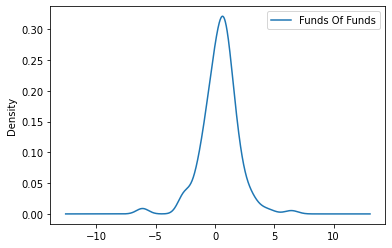

In [35]:
df_1 = df[["Funds Of Funds"]]
df_1.plot.density()

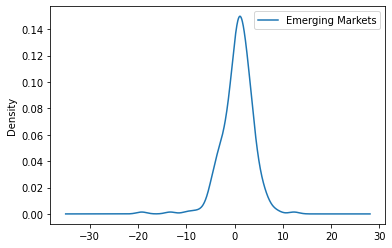

In [34]:
df_2 = df[["Emerging Markets"]]
df_2.plot.density()



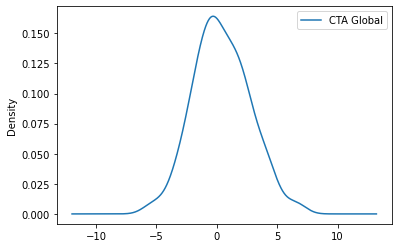

In [36]:
df_3 = df[["CTA Global"]]
df_3.plot.density()

# Skewness

Now, let's develop the code to compute the skewness of a series of numbers.

Recall that the skewness is given by:

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$

In [0]:
def skewness(r):
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [19]:
skewness(df)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

In [22]:
scipy.stats.skew(df)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

Funds Of Funds   -0.361783
dtype: float64


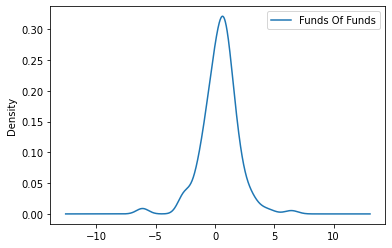

In [44]:
print(skewness(df_1))
df_1.plot.density()

# Kurtosis


$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$


In [0]:
def kurtosis(r):
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4


In [39]:
kurtosis(df)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [40]:
scipy.stats.kurtosis(df)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])